In [37]:
result_file = 'result.csv'
model = 'Ailerons_d10_l703_n1405_20240903085723'

In [38]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
188,Ailerons_d10_l703_n1405_20240903085723,False,0.00000,Ailerons,1G,4,0.627749
189,Ailerons_d10_l703_n1405_20240903085723,True,-0.00318,Ailerons,1G,4,0.616438
190,Ailerons_d10_l703_n1405_20240903085723,True,-0.00286,Ailerons,1G,4,0.561028
191,Ailerons_d10_l703_n1405_20240903085723,True,-0.00254,Ailerons,1G,4,0.558304
192,Ailerons_d10_l703_n1405_20240903085723,True,-0.00222,Ailerons,1G,4,0.571927
193,Ailerons_d10_l703_n1405_20240903085723,True,-0.00190,Ailerons,1G,4,0.655834
194,Ailerons_d10_l703_n1405_20240903085723,True,-0.00158,Ailerons,1G,4,0.571719
195,Ailerons_d10_l703_n1405_20240903085723,True,-0.00126,Ailerons,1G,4,0.583810
196,Ailerons_d10_l703_n1405_20240903085723,True,-0.00094,Ailerons,1G,4,0.583161
197,Ailerons_d10_l703_n1405_20240903085723,True,-0.00062,Ailerons,1G,4,0.577914


In [39]:
base_line = df[df['pruned'] == False]['time'].values[0]
x = df[df['pruned'] == True]['predicate'].values
y = df[df['pruned'] == True]['time'].values
y

array([0.61643831, 0.56102808, 0.55830352, 0.57192739, 0.65583428,
       0.57171933, 0.58381009, 0.58316072, 0.57791352, 0.56364083])

(0.0, 0.6607108155886332)

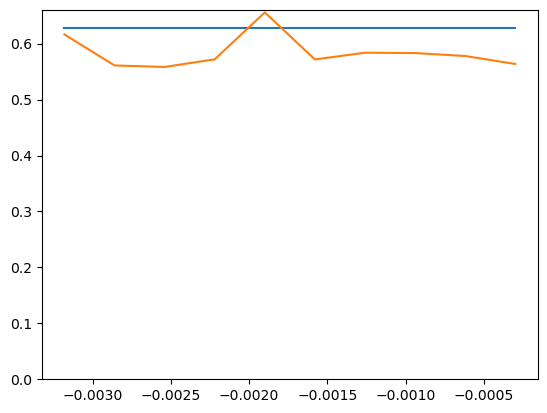

In [40]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))])
plt.plot(x, y)
plt.ylim(0)

(0.0, 1.132747646412081)

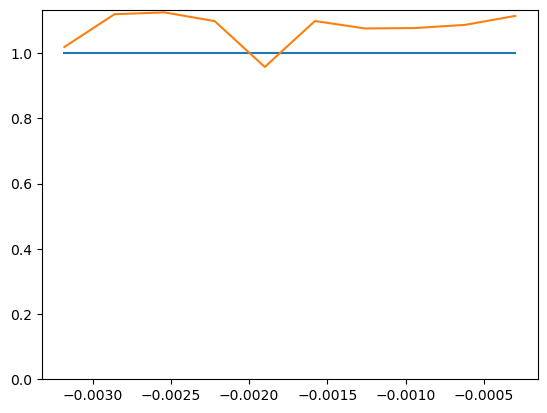

In [41]:
plt.plot(x, [1 for _ in range(len(x))])
plt.plot(x, base_line / y)
plt.ylim(0)